In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rc('font',**{'family':'Avenir', 'size': 20})

plt.rcParams['pdf.fonttype'] = 42

In [2]:
df=pd.read_csv('Cascades_CpxAmp_NN.csv')
df_Cpx=df.loc[df['Mineral']=='Clinopyroxene']
S_Cpx=df_Cpx['NN_Labels']=='Clinopyroxene'
S_Amp=df_Cpx['NN_Labels']=='Amphibole'
S_Opx=df_Cpx['NN_Labels']=='Orthopyroxene'
S_Gt=df_Cpx['NN_Labels']=='Garnet'
S_Zr=df_Cpx['NN_Labels']=='Zircon'
S_Plg=df_Cpx['NN_Labels']=='Plagioclase'
df_Amp=df.loc[df['Mineral']=='Amphibole']
SA_Cpx=df_Amp['NN_Labels']=='Clinopyroxene'
SA_Amp=df_Amp['NN_Labels']=='Amphibole'

SA_Opx=df_Amp['NN_Labels']=='Orthopyroxene'


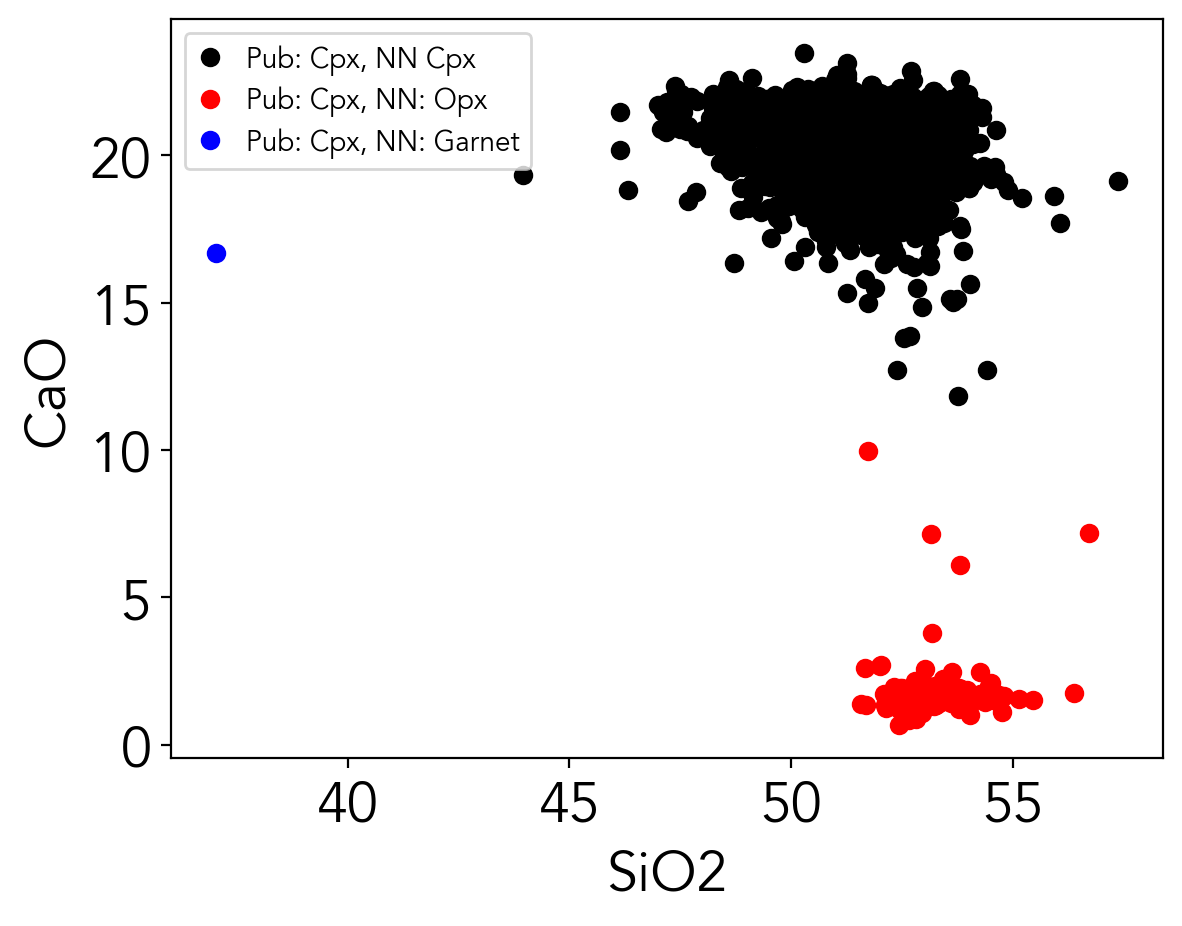

In [3]:
x='SiO2'
y='CaO'
plt.plot(df_Cpx[x].loc[S_Cpx], df_Cpx[y].loc[S_Cpx], 'ok', label='Pub: Cpx, NN Cpx')
plt.plot(df_Cpx[x].loc[S_Opx], df_Cpx[y].loc[S_Opx], 'or', label='Pub: Cpx, NN: Opx')
plt.plot(df_Cpx[x].loc[S_Gt], df_Cpx[y].loc[S_Gt], 'ob', label='Pub: Cpx, NN: Garnet')
#plt.plot(df_Cpx[x].loc[S_Plg], df_Cpx[y].loc[S_Plg], 'oc', label='Plg')

plt.xlabel(x)
plt.ylabel(y)
plt.legend(prop={'size': 10}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)


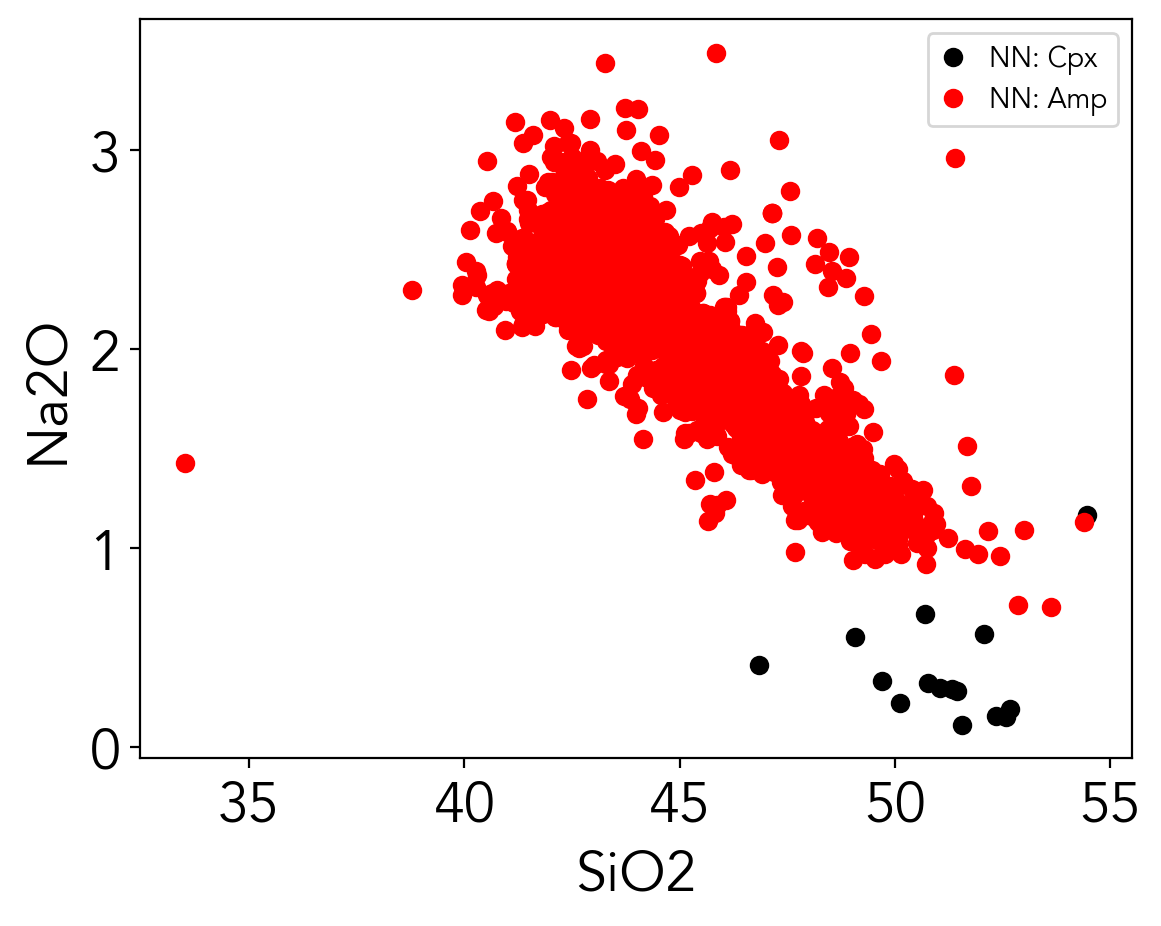

In [4]:
plt.legend('Things published as Amp')
x='SiO2'
y='Na2O'
plt.plot(df_Amp[x].loc[SA_Cpx], df_Amp[y].loc[SA_Cpx], 'ok', label='NN: Cpx')
plt.plot(df_Amp[x].loc[SA_Amp], df_Amp[y].loc[SA_Amp], 'or', label='NN: Amp')
plt.xlabel(x)
plt.ylabel(y)
plt.legend(prop={'size': 10}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)


meta NOT subset; don't know how to subset; dropped


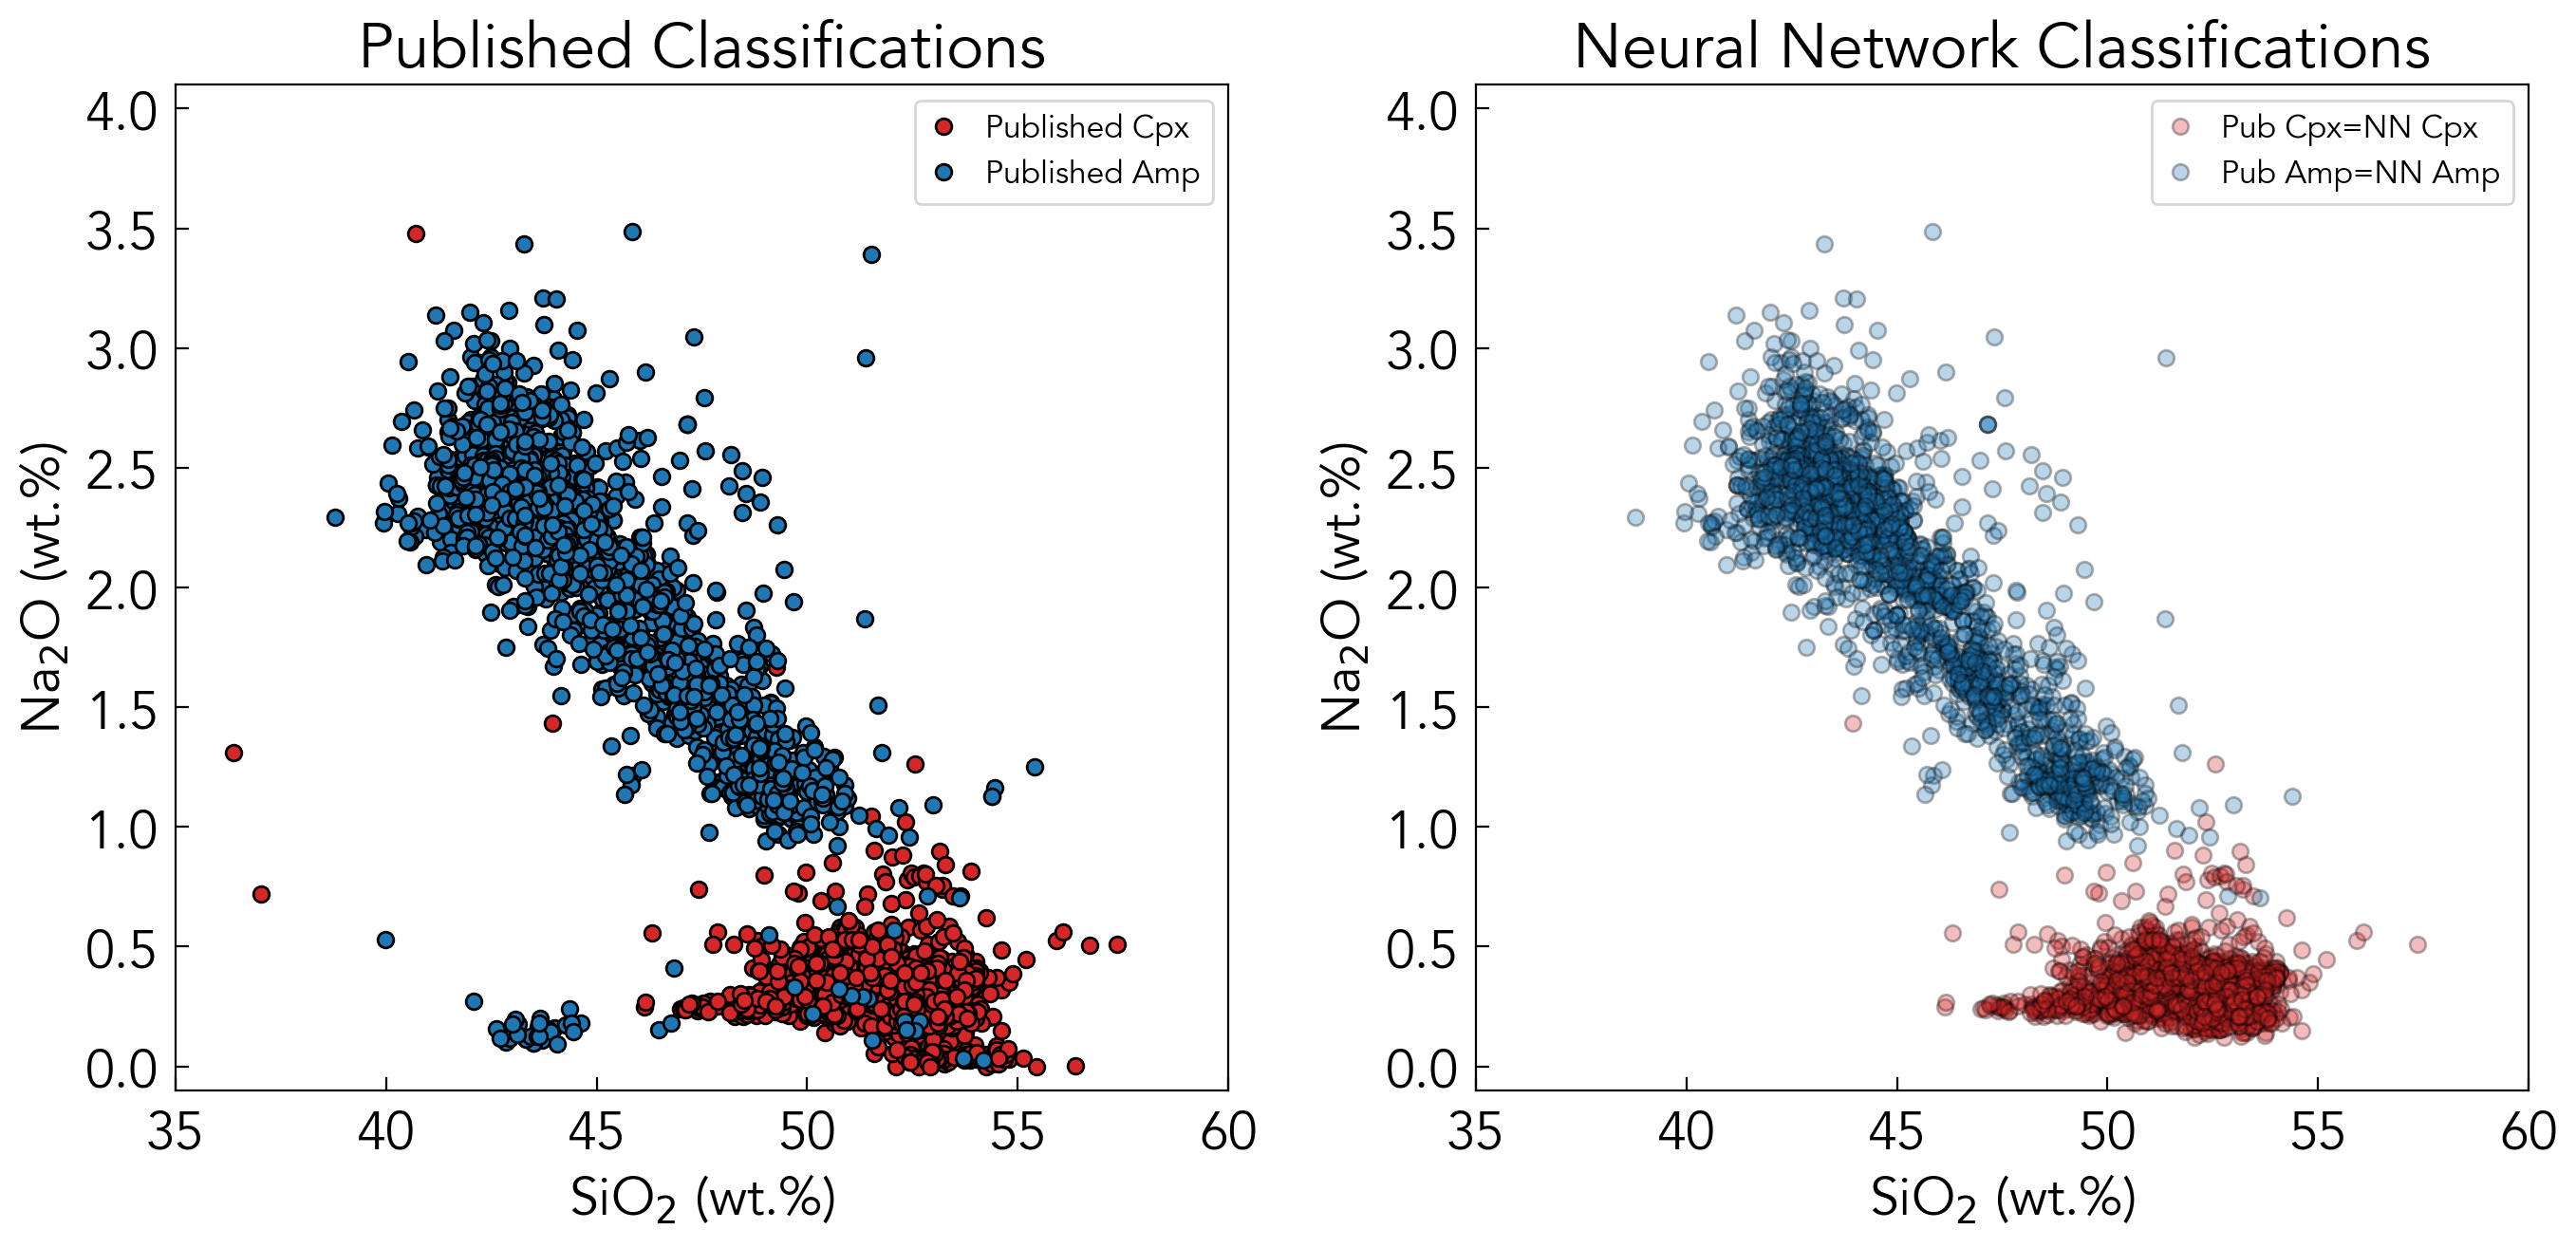

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)
x='SiO2'
y='Na2O'
ax1.set_title('Published Classifications')
ax1.plot(df_Cpx[x], df_Cpx[y], 'ok', mfc='tab:red', label='Published Cpx')
ax1.plot(df_Amp[x], df_Amp[y], 'ok', mfc='tab:blue', label='Published Amp')
ax1.legend(prop={'size': 12}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)
ax1.tick_params(axis="x", direction='in', length=5, pad = 6.5) 
ax1.tick_params(axis="y", direction='in', length=5, pad = 6.5)


ax2.set_title('Neural Network Classifications')
ax2.plot(df_Cpx[x].loc[S_Cpx], df_Cpx[y].loc[S_Cpx], 'ok', mfc='tab:red', label='Pub Cpx=NN Cpx', alpha=0.3)
ax2.plot(df_Amp[x].loc[SA_Amp], df_Amp[y].loc[SA_Amp], 'ok', mfc='tab:blue', label='Pub Amp=NN Amp', alpha=0.3)

# ax2.plot(df_Amp[x].loc[SA_Cpx], df_Amp[y].loc[SA_Cpx], 'dk', mfc='cyan', lw=1, mec='black', label='Pub Amp; NN Cpx', ms=8)
# ax2.plot(df_Cpx[x].loc[S_Amp], df_Cpx[y].loc[S_Amp], 'dk',  mfc='yellow', lw=1, mec='black', label='Pub Cpx; NN Amp', ms=8)

ax1.set_xlim([35, 60])
ax1.set_ylim([-0.1, 4.1])
ax2.legend(prop={'size': 12}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)
ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_xlabel('SiO$_\mathrm{2}$ (wt.%)')
ax1.set_ylabel('Na$_\mathrm{2}$O (wt.%)')
ax2.set_xlabel('SiO$_\mathrm{2}$ (wt.%)')
ax2.set_ylabel('Na$_\mathrm{2}$O (wt.%)')
ax2.tick_params(axis="x", direction='in', length=5, pad = 6.5) 
ax2.tick_params(axis="y", direction='in', length=5, pad = 6.5)
plt.tight_layout()
plt.savefig('nnvspub_pre.pdf', bbox_inches='tight', pad_inches = 0.025)


In [115]:
All_Cpx=df_Cpx.add_suffix('_Cpx').fillna(0)
All_Cpx.head()
Sarah_Cpx=All_Cpx[S_Cpx]
Sarah_Cpx_Amp=All_Cpx[S_Amp]
Sarah_Cpx_Gt=All_Cpx[S_Gt]

In [118]:
All_P=pt.calculate_cpx_only_press_temp(cpx_comps=All_Cpx, equationP='P_Jorgenson2022_Cpx_only',
                                       equationT='T_Jorgenson2022_Cpx_only')
Sarah_P=pt.calculate_cpx_only_press_temp(cpx_comps=Sarah_Cpx, equationP='P_Jorgenson2022_Cpx_only',
                                         equationT='T_Jorgenson2022_Cpx_only')
Sarah_PAmp=pt.calculate_cpx_only_press_temp(cpx_comps=Sarah_Cpx_Amp, equationP='P_Jorgenson2022_Cpx_only',
                                         equationT='T_Jorgenson2022_Cpx_only')
Sarah_PGt=pt.calculate_cpx_only_press_temp(cpx_comps=, equationP='P_Jorgenson2022_Cpx_only',
                                         equationT='T_Jorgenson2022_Cpx_only')

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Youve selected a P-independent function
Youve selected a T-independent function


In [125]:
Sarah_PAmp['Reference_Cpx']

0                 Moore_DeBari2012
1                 Moore_DeBari2012
2     Hildreth and Fierstein, 1997
3                    DiGuilio_2015
4             Scruggs_Putirka_2018
5             Scruggs_Putirka_2018
6             Scruggs_Putirka_2018
7             Scruggs_Putirka_2018
8             Scruggs_Putirka_2018
9             Scruggs_Putirka_2018
10            Scruggs_Putirka_2018
Name: Reference_Cpx, dtype: object

Text(0, 0.5, 'Calc P')

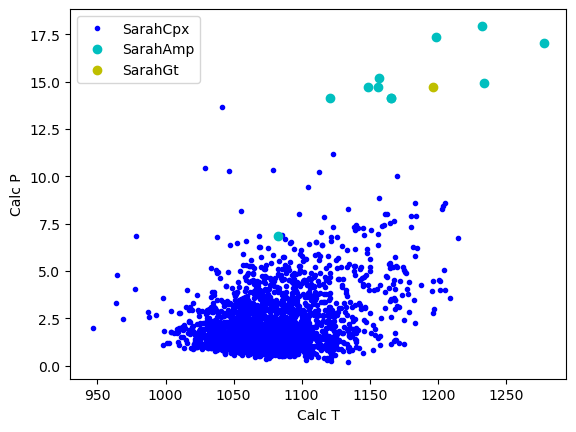

In [124]:
#plt.plot( All_P['T_K_calc'], All_P['P_kbar_calc'],'ok', label='All Cpx')
plt.plot( Sarah_P['T_K_calc']-273.15, Sarah_P['P_kbar_calc'],  '.b',label='SarahCpx')
plt.plot( Sarah_PAmp['T_K_calc']-273.15,Sarah_PAmp['P_kbar_calc'],  'oc',  label='SarahAmp')
plt.plot( Sarah_PGt['T_K_calc']-273.15,Sarah_PGt['P_kbar_calc'],  'oy',  label='SarahGt')

plt.legend()
plt.xlabel('Calc T')
plt.ylabel('Calc P')

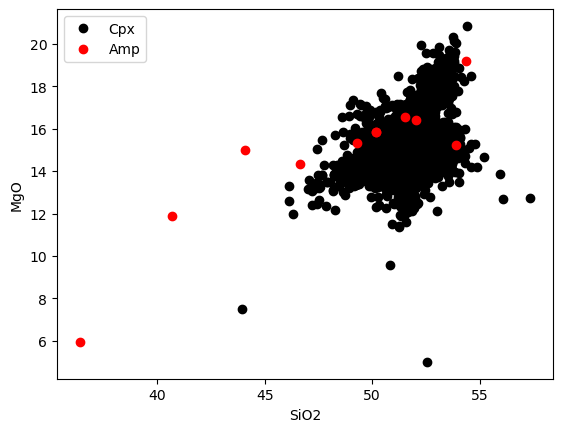

In [20]:
x='SiO2'
y='MgO'
plt.plot(df_Cpx[x].loc[S_Cpx], df_Cpx[y].loc[S_Cpx], 'ok', label='Cpx')
plt.plot(df_Cpx[x].loc[S_Amp], df_Cpx[y].loc[S_Amp], 'or', label='Amp')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()